In [28]:
# Instalar lo necesario
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import rayleigh
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

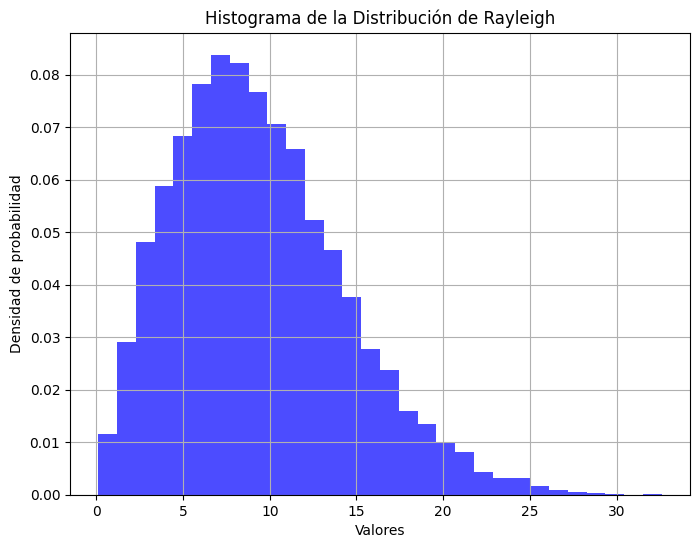

In [29]:



# Parámetro de escala para la distribución de Rayleigh
scale_rayleigh = 7.53

# Tamaño de la muestra
sample_size = 10000

# Generar la muestra aleatoria de la distribución de Rayleigh
rayleigh_sample = np.random.rayleigh(scale=scale_rayleigh, size=sample_size)

# Visualizar la distribución en un histograma


plt.figure(figsize=(8, 6))
plt.hist(rayleigh_sample, bins=30, alpha=0.7, color='blue', density=True)
plt.title('Histograma de la Distribución de Rayleigh')
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()


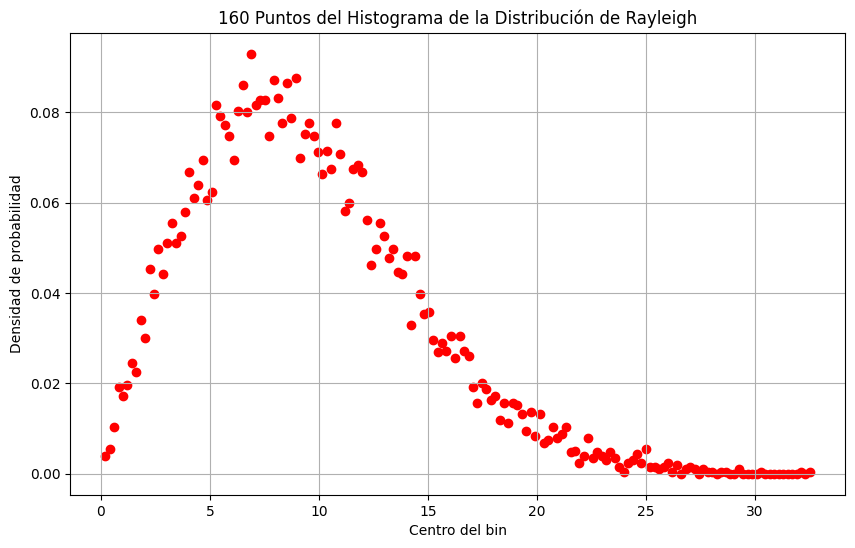

In [30]:

# Definimos el número de bins
num_bins = 160

# Calculamos el histograma y los bordes de los bins
hist, bin_edges = np.histogram(rayleigh_sample, bins=num_bins, density=True)

# Obtenemos los centros de los bins, que serán nuestras variables 'x' en la regresión
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Visualización de los puntos del histograma
plt.figure(figsize=(10, 6))
plt.scatter(bin_centers, hist, color='red', marker='o')
plt.title('160 Puntos del Histograma de la Distribución de Rayleigh')
plt.xlabel('Centro del bin')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()

In [31]:
# Convertimos los centros de los bins y las densidades a arrays para el entrenamiento
X = bin_centers.reshape(-1, 1)  # Necesario para que tenga la forma correcta
y = hist

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos las dimensiones de los conjuntos para confirmar la división
print("Tamaño del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento: (128, 1) (128,)
Tamaño del conjunto de prueba: (32, 1) (32,)


In [32]:
# Lista para almacenar los resultados
results = []

# Probamos grados de polinomios del 1 al 10
for degree in range(1, 11):
    # Transformamos los datos al grado de polinomio actual
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Creamos y entrenamos el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Realizamos predicciones en el conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculamos las métricas
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    # Almacenamos los resultados
    results.append({
        'Grado del polinomio': degree,
        'MAE': mae,
        'MSE (Entrenamiento)': train_mse,
        'MSE (Prueba)': test_mse,
        'R^2': r2
    })

# Convertimos los resultados en un DataFrame para visualización
results_df = pd.DataFrame(results)
print(results_df)

   Grado del polinomio       MAE  MSE (Entrenamiento)  MSE (Prueba)       R^2
0                    1  0.011255             0.000419      0.000201  0.750979
1                    2  0.012951             0.000367      0.000233  0.710865
2                    3  0.006032             0.000085      0.000060  0.926069
3                    4  0.003389             0.000019      0.000023  0.971869
4                    5  0.003620             0.000019      0.000022  0.972891
5                    6  0.003114             0.000013      0.000016  0.980513
6                    7  0.002946             0.000013      0.000015  0.980997
7                    8  0.002938             0.000013      0.000015  0.981411
8                    9  0.002946             0.000012      0.000015  0.981679
9                   10  0.002990             0.000013      0.000016  0.980655


In [33]:
# Lista para almacenar los resultados con regularización
results_ridge = []

# Probamos grados de polinomios del 1 al 10
for degree in range(1, 11):
    # Transformamos los datos al grado de polinomio actual
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    
    # Creamos el modelo Ridge con regularización
    model_ridge = Ridge(alpha=1.0)  # alpha es el parámetro de regularización, ajustable según sea necesario
    
    # Evaluamos el modelo usando validación cruzada con 5 folds
    mae_scores = -cross_val_score(model_ridge, X_train_poly, y_train, scoring='neg_mean_absolute_error', cv=5)
    mse_scores = -cross_val_score(model_ridge, X_train_poly, y_train, scoring='neg_mean_squared_error', cv=5)
    r2_scores = cross_val_score(model_ridge, X_train_poly, y_train, scoring='r2', cv=5)
    
    # Almacenamos los resultados
    results_ridge.append({
        'Grado del polinomio': degree,
        'MAE (CV)': np.mean(mae_scores),
        'MSE (CV)': np.mean(mse_scores),
        'R^2 (CV)': np.mean(r2_scores)
    })

# Convertimos los resultados en un DataFrame para visualización
results_ridge_df = pd.DataFrame(results_ridge)
print(results_ridge_df)


/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.48931e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.93796e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.01882e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ri

   Grado del polinomio  MAE (CV)  MSE (CV)  R^2 (CV)
0                    1  0.015306  0.000422  0.535540
1                    2  0.016478  0.000381  0.581480
2                    3  0.008405  0.000093  0.898255
3                    4  0.003345  0.000021  0.976994
4                    5  0.003570  0.000021  0.976600
5                    6  0.002762  0.000014  0.983974
6                    7  0.002603  0.000014  0.983978
7                    8  0.002569  0.000014  0.983902
8                    9  0.002602  0.000015  0.983641
9                   10  0.002655  0.000015  0.982983


/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.6779e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.0945e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.20312e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/shaman/.cache/pypoetry/virtualenvs/machine-learning-3DbA06_O-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridg

In [34]:
# Imprimimos los DataFrames para revisar los resultados
print("Resultados sin regularización:")
print(results_df)
print("\nResultados con regularización:")
print(results_ridge_df)

# Identificamos el modelo con el mejor R^2 en el conjunto de prueba y errores bajos
# Asumimos que ya tenemos esta información impresa y analizada

# Supongamos que el mejor modelo es un polinomio de grado 4 con regularización, basado en un buen balance de métricas
best_degree = 4

# Entrenamos de nuevo ese modelo para obtener sus parámetros
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train)
model_ridge_best = Ridge(alpha=1.0)
model_ridge_best.fit(X_train_poly, y_train)


Resultados sin regularización:
   Grado del polinomio       MAE  MSE (Entrenamiento)  MSE (Prueba)       R^2
0                    1  0.011255             0.000419      0.000201  0.750979
1                    2  0.012951             0.000367      0.000233  0.710865
2                    3  0.006032             0.000085      0.000060  0.926069
3                    4  0.003389             0.000019      0.000023  0.971869
4                    5  0.003620             0.000019      0.000022  0.972891
5                    6  0.003114             0.000013      0.000016  0.980513
6                    7  0.002946             0.000013      0.000015  0.980997
7                    8  0.002938             0.000013      0.000015  0.981411
8                    9  0.002946             0.000012      0.000015  0.981679
9                   10  0.002990             0.000013      0.000016  0.980655

Resultados con regularización:
   Grado del polinomio  MAE (CV)  MSE (CV)  R^2 (CV)
0                    1  0.

Ridge()

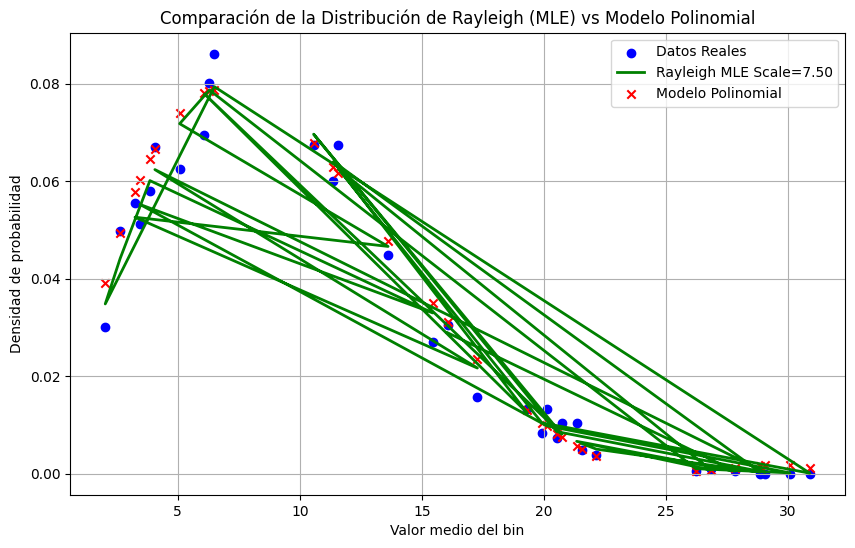

MSE Rayleigh MLE: 0.0000, R^2 Rayleigh MLE: 0.9817


In [35]:

# Estimación del parámetro de escala usando MLE
scale_mle = np.sqrt(np.mean(rayleigh_sample**2) / 2)

# Generamos valores de la función de densidad de probabilidad de Rayleigh con el parámetro estimado
rayleigh_pdf_mle = rayleigh.pdf(X_test, scale=scale_mle)

# Visualizamos la comparación
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, rayleigh_pdf_mle, label=f'Rayleigh MLE Scale={scale_mle:.2f}', color='green', linewidth=2)
plt.scatter(X_test, model_ridge_best.predict(poly.transform(X_test)), color='red', label='Modelo Polinomial', marker='x')
plt.title('Comparación de la Distribución de Rayleigh (MLE) vs Modelo Polinomial')
plt.xlabel('Valor medio del bin')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de métricas para comparar
from sklearn.metrics import mean_squared_error, r2_score

mse_rayleigh = mean_squared_error(y_test, rayleigh_pdf_mle)
r2_rayleigh = r2_score(y_test, rayleigh_pdf_mle)
print(f"MSE Rayleigh MLE: {mse_rayleigh:.4f}, R^2 Rayleigh MLE: {r2_rayleigh:.4f}")